# PCA

## Customer Satisfaction Analysis

A survey in order to evaluate 20 different healthcare structures. 2000 customers have evaluated, with a 1-10 scale, each of six features of the service:

1. Courtesy
2. Clarity
3. Competence
4. Condition (of the structure)
5. Promptness (of the service)
6. Opening times

In [12]:
import numpy as np
import pandas as pd

In [13]:
df2 = pd.read_csv("csat.csv")
print(df2.head())

df2.describe()


   Courtesy  Clarity  Competence  Condition  Promptness  Opening_times
0         7        5           9          8           6              7
1         5        6           8          4           4              6
2         5        5           8          7           7              7
3         6        6           9          7           6              7
4         7        5          10          4           3              6


,Courtesy,Clarity,Competence,Condition,Promptness,Opening_times
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,4.800000,4.600000,7.600000,6.150000,5.000000,6.300000
std,1.105013,0.994723,1.535544,1.814416,1.169795,0.732695
min,3.000000,3.000000,5.000000,3.000000,3.000000,5.000000
25%,4.000000,4.000000,6.750000,4.750000,4.000000,6.000000
50%,5.000000,5.000000,8.000000,6.500000,5.000000,6.000000
75%,5.000000,5.000000,8.250000,7.250000,6.000000,7.000000
max,7.000000,6.000000,10.000000,9.000000,7.000000,7.000000


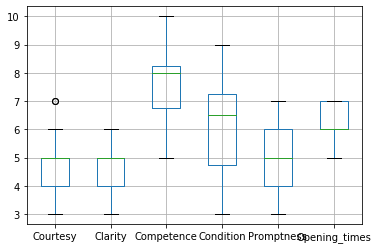

In [14]:
%matplotlib inline
df2.boxplot()


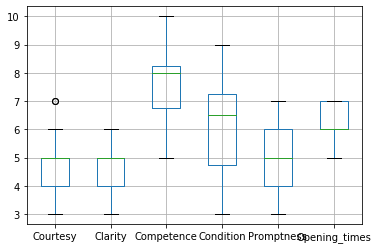

In [15]:
#dataset scaling and visualizing
from sklearn.preprocessing import StandardScaler
scaler2 = StandardScaler(copy=False) #or alternatively use MinMaxScaler
scaler2.fit(df2.astype(float)) # 
scaler2.transform(df2.astype(float))
df2.boxplot()

In [16]:
df2_scaled=pd.DataFrame(scaler2.transform(df2.astype(float))) 
df2_scaled.columns=df2.columns
df2_scaled.head()

,Courtesy,Clarity,Competence,Condition,Promptness,Opening_times
0,2.042649,0.412568,0.935414,1.046100,0.877058,0.980196
1,0.185695,1.443990,0.267261,-1.215737,-0.877058,-0.420084
2,0.185695,0.412568,0.267261,0.480640,1.754116,0.980196
3,1.114172,1.443990,0.935414,0.480640,0.877058,0.980196
4,2.042649,0.412568,1.603567,-1.215737,-1.754116,-0.420084


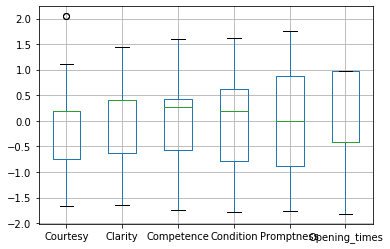

In [17]:
df2_scaled.boxplot()

In [18]:
df2.apply(lambda s: df2.corrwith(s))

,Courtesy,Clarity,Competence,Condition,Promptness,Opening_times
Courtesy,1.000000,0.545861,0.694808,-0.115503,0.000000,0.143014
Clarity,0.545861,1.000000,0.544426,-0.081652,0.045231,0.101100
Competence,0.694808,0.544426,1.000000,0.003778,-0.058601,-0.121628
Condition,-0.115503,-0.081652,0.003778,1.000000,0.719114,0.439450
Promptness,0.000000,0.045231,-0.058601,0.719114,1.000000,0.798282
Opening_times,0.143014,0.101100,-0.121628,0.439450,0.798282,1.000000


In [19]:
#PCA fit
from sklearn.decomposition import PCA
# we can choose the number of components e.g. 10, the percentage of the total variance or set it to None (that means it automatically chooses the number of components)
pca2 = PCA()
pca2.fit(df2_scaled) #The fit learns some quantities from the data, most importantly the "components" and "explained variance"

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [20]:
#let's use the pca to transform the dataset
df2_pca = pd.DataFrame(pca2.transform(df2_scaled))

In [21]:
#Let's analyse what happened
#VISUALIZE The amount of variance explained by each of the 10 selected principal components.
pd.DataFrame(pca2.explained_variance_).transpose()

,0,1,2,3,4,5
0,2.450138,2.313038,0.712002,0.507948,0.216216,0.116447


In [22]:
#VISUALIZE The percentage of variance explained by each of the selected components.
explained_var=pd.DataFrame(pca2.explained_variance_ratio_).transpose()
explained_var

,0,1,2,3,4,5
0,0.387939,0.366231,0.112734,0.080425,0.034234,0.018437


In [23]:
#VISUALIZE The cumulative percentage of explained variance
cum_explained_var=np.cumsum(pca2.explained_variance_ratio_)
pd.DataFrame(cum_explained_var).transpose()

,0,1,2,3,4,5
0,0.387939,0.75417,0.866903,0.947328,0.981563,1.0


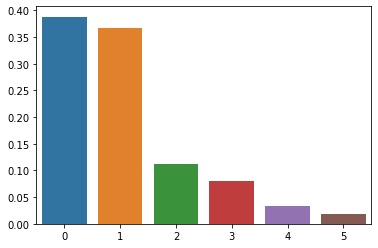

In [24]:
%matplotlib inline
import seaborn as sns
ax = sns.barplot( data=explained_var)

In [25]:
pd.DataFrame(pca2.components_,index=['PC1','PC2','PC3','PC4','PC5','PC6'],columns=df2.columns)


,Courtesy,Clarity,Competence,Condition,Promptness,Opening_times
PC1,0.108588,0.082955,0.166297,-0.527831,-0.616793,-0.542802
PC2,-0.586905,-0.538902,-0.562070,-0.051455,-0.135631,-0.167814
PC3,-0.123933,-0.244882,0.467594,0.651152,-0.018854,-0.530731
PC4,0.537682,-0.790670,0.155511,-0.143601,-0.023690,0.200931
PC5,0.545638,0.131997,-0.617261,0.443239,-0.274763,-0.178578
PC6,0.203886,-0.012432,-0.180513,-0.278686,0.724403,-0.568564


### 1st component:

The variables

   - Condition
   - Promptness
   - Opening-times

show a high correlation with the first component. This component can be summarized as an index of the **structure’s performances**

### 2nd component:

The variables
   - Courtesy
   - Clarity
   - Competence

show a high correlation with the second component. 
This component can be summarized as an index of the **personnel’s performance**

**Notice that the Principal Components have negative values in the variables that they explain.**

In [26]:
df2_pca.columns=['PC1','PC2','PC3','PC4','PC5','PC6']
df2_pca

,PC1,PC2,PC3,PC4,PC5,PC6
0,-1.213592,-2.284217,0.227626,0.943510,0.639256,0.028990
1,1.595084,-0.785365,-0.803792,-0.889361,-0.095906,-0.086024
2,-1.768841,-0.908673,-0.239397,-0.098422,-0.453160,0.563923
3,-0.930384,-2.266028,-0.278082,-0.290028,0.018155,-0.015550
4,2.474352,-1.951528,-0.139969,1.153190,0.197307,-0.571159
5,0.983820,-0.337580,-0.430245,1.220114,-0.102566,0.764267
6,3.007233,-0.806971,0.268340,-1.046038,-0.017288,-0.045829
7,1.211056,-0.258626,-0.183017,-0.155048,0.018583,-0.230788
8,-0.224336,1.040537,0.592068,-0.125843,0.048535,0.033514
9,-1.227878,-0.789717,-0.222861,-0.077645,-0.212176,-0.071421


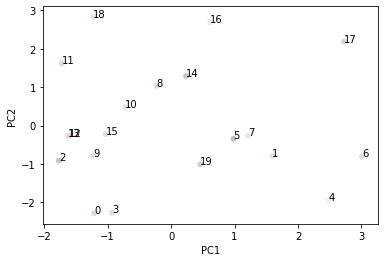

In [27]:
p1=sns.scatterplot(x="PC1", y="PC2",
              alpha=.3, 
              hue="PC6", legend=False,
              data=df2_pca);

# add annotations one by one with a loop
for line in range(0,df2_pca.shape[0]):
     p1.text(df2_pca.PC1[line], df2_pca.PC2[line], line, horizontalalignment='left', size='medium', color='black')


We conclude that 
 - centers 18,11 has a GOOD infrastructure but a BAD service
 - the group near 1,4,6 has BAD infrastructure but GOOD service quality 
 - the group 0,3,2,9 has GOOD infrastructure and service
 - center 17 has BAD infrastructure and service!

## Breast cancer wisconsin (diagnostic) dataset

In [28]:
#upload a toy datasets from scikit-learn
#sklearn comes with a few small standard datasets that do not require to download any file from some external website
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer() #The breast cancer dataset is a classic and very easy binary classification dataset.

#create the dataframe
dataset_df = pd.DataFrame(dataset.data)
columns = dataset.feature_names
dataset_df.columns = columns

print(dataset["DESCR"])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


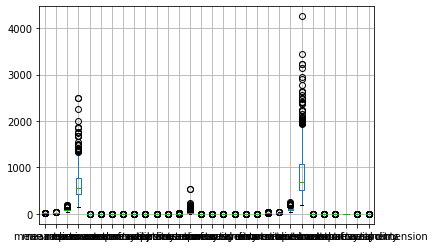

In [29]:
#dataset visualization tools
%matplotlib inline
dataset_df.boxplot()
dataset_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,0
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,0
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,0
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,0
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,0


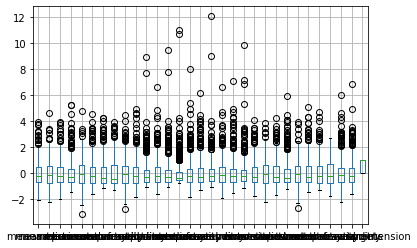

In [53]:
#dataset scaling and visualizing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(copy=False) #or alternatively use MinMaxScaler
scaler.fit(dataset_df) 
scaler.transform(dataset_df) 
dataset_df.boxplot()
dataset_df.head()

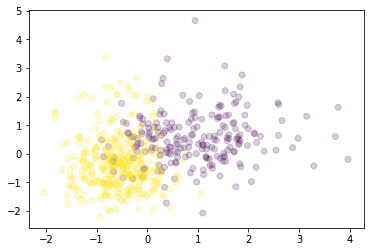

In [54]:
import numpy as np
import matplotlib.pyplot as plt

x = dataset_df.iloc[:,0]
y = dataset_df.iloc[:,1]

dataset_df['target'] = dataset.target  

plt.scatter(x, y,alpha=0.2,c=dataset_df['target'] )
plt.show()

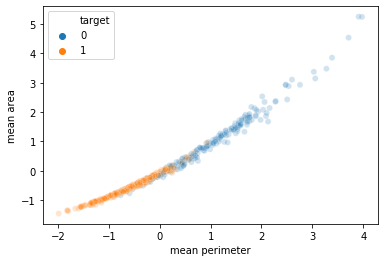

In [55]:
%matplotlib inline
import seaborn as sns

sns.scatterplot(x="mean perimeter", y="mean area",
              hue="target", alpha=.2,
              data=dataset_df);


In [56]:
#PCA fit
from sklearn.decomposition import PCA
# we can choose the number of components e.g. 10, the percentage of the total variance or set it to None (that means it automatically chooses the number of components)
pca = PCA(n_components=10)
pca.fit(dataset_df) #The fit learns some quantities from the data, most importantly the "components" and "explained variance"

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [57]:
#let's use the pca to transform the dataset
x_pca = pca.transform(dataset_df)
print("Dataset shape before PCA: ", dataset_df.shape)
print("Dataset shape after PCA: ", x_pca.shape)

Dataset shape before PCA:  (569, 31)
Dataset shape after PCA:  (569, 10)


In [58]:
#Let's analyse what happened
#VISUALIZE The amount of variance explained by each of the 10 selected principal components.
pd.DataFrame(pca.explained_variance_).transpose()

,0,1,2,3,4,5,6,7,8,9
0,13.450545,5.709658,2.829363,1.988015,1.653969,1.209514,0.67797,0.478543,0.417629,0.351324


In [59]:
#VISUALIZE The percentage of variance explained by each of the selected components.
explained_var=pd.DataFrame(pca.explained_variance_ratio_).transpose()
explained_var

,0,1,2,3,4,5,6,7,8,9
0,0.444103,0.188518,0.093418,0.065639,0.05461,0.039935,0.022385,0.0158,0.013789,0.0116


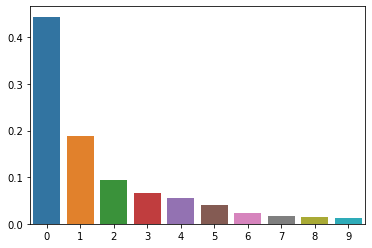

In [60]:
%matplotlib inline
import seaborn as sns
sns.barplot( data=explained_var)

In [61]:
#VISUALIZE The cumulative percentage of explained variance
cum_explained_var = np.cumsum(pca.explained_variance_ratio_)
pd.DataFrame(cum_explained_var).transpose()

,0,1,2,3,4,5,6,7,8,9
0,0.444103,0.632621,0.72604,0.791679,0.846289,0.886224,0.908609,0.924409,0.938198,0.949798


In [62]:
#PRINT the total percentage of explained variance 
print(cum_explained_var[-1]) 

0.9497981009207074


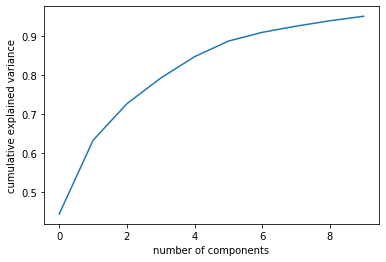

In [63]:
#CHOOSING THE NUMBER OF COMPONENTS - we can plot the cumulative percentage of explained variance
import matplotlib.pyplot as plt
plt.plot(cum_explained_var)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

This previous curve quantifies how much of the total, 30-dimensional variance is contained within the first 10 components. 
For example, we see that the first 4 components contain approximately 79% of the variance, 
while you need around 6 components to describe close to 95% of the variance.

In [64]:
pd.DataFrame(pca.components_,index=['pc1', 'pc2','pc3','pc4','pc5', 'pc6','pc7','pc8','pc9','pc10'],columns=dataset_df.columns).transpose()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10
mean radius,0.218381,-0.232148,-0.006059,-0.043419,0.038701,0.018845,-0.122406,-0.009992,-0.223113,0.095752
mean texture,0.103732,-0.059374,0.062285,0.602489,-0.043066,-0.031729,0.014054,0.126755,0.112690,0.241788
mean perimeter,0.226899,-0.213414,-0.006817,-0.044043,0.038341,0.017424,-0.112605,-0.021376,-0.223743,0.086699
mean area,0.220346,-0.229239,0.031269,-0.055146,0.011202,-0.001739,-0.049779,0.031856,-0.195591,0.075386
mean smoothness,0.141427,0.186749,-0.103979,-0.157347,-0.365630,-0.286082,-0.136765,-0.292223,0.006427,-0.069021
mean compactness,0.237468,0.153456,-0.072542,-0.033720,0.012909,-0.013929,0.033996,-0.154188,-0.167843,0.013477
mean concavity,0.256740,0.061989,0.004474,-0.021047,0.087137,-0.009286,-0.105627,-0.075467,0.040589,-0.135148
mean concave points,0.259586,-0.032989,-0.023661,-0.066420,-0.043334,-0.051923,-0.148258,-0.154447,-0.111970,0.008165
mean symmetry,0.136951,0.191039,-0.040264,-0.065373,-0.305613,0.356718,-0.090988,-0.233980,0.256042,0.572124
mean fractal dimension,0.062813,0.366850,-0.022995,-0.048228,-0.044691,-0.119328,0.296479,-0.175038,-0.123735,0.080875


In [65]:
# Let see the coordinates of the data in the PCA 
principalDf = pd.DataFrame(data = x_pca
             , columns = ['pc1', 'pc2','pc3','pc4','pc5', 'pc6','pc7','pc8','pc9','pc10'])
principalDf.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10
0,9.200959,1.988220,-1.083818,-3.648084,-1.208407,1.413034,2.167069,-0.388484,-0.157098,-0.878265
1,2.451039,-3.772454,-0.523444,-1.119968,0.606201,0.026701,-0.005476,0.260897,-0.711879,1.103376
2,5.771537,-1.058914,-0.537394,-0.918904,-0.180261,0.541430,-0.667549,0.092604,0.024059,0.454470
3,7.124952,10.286359,-3.257253,-0.136660,-2.956659,3.055379,1.422548,1.073148,-1.405446,-1.117491
4,3.981010,-1.938210,1.404713,-2.928597,0.506583,-1.230029,-0.959753,0.648510,-0.263801,0.376271


In [66]:
principalDf['target']=dataset.target
dataset.target_names

array(['malignant', 'benign'], dtype='<U9')

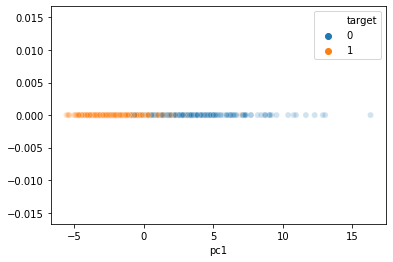

In [67]:
# The data in the first PCA 
sns.scatterplot(x="pc1",y=[0]*(principalDf['target'].size),
              hue="target", alpha=.2,
              data =principalDf);

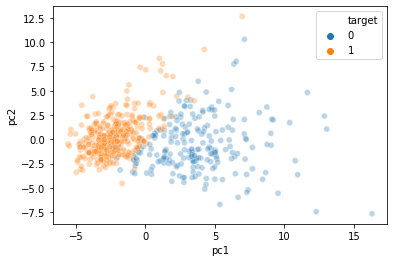

In [68]:
# The data in the first two PCA 
sns.scatterplot(x="pc1", y="pc2",
              hue="target", alpha=.3,
              data=principalDf);

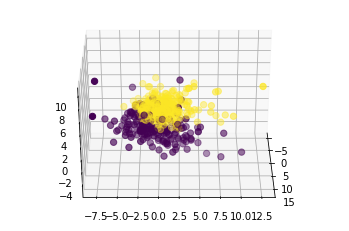

In [74]:
# The data in the first three PCA 

from mpl_toolkits.mplot3d import axes3d

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(principalDf['pc1'], principalDf['pc2'],principalDf['pc3'], c=principalDf['target'], s=40)
ax.view_init(30, 0)
plt.show()

In [70]:
#A PART FROM EXPLICITLY CHOOSE THE NUMBER OF PRINCIPAL COMPONENTS, YOU CAN RESORT TO SOME AUTOMATIC TOOLS SUCH AS:

#(1) You can leave the pca implementation of sklearn to choose the number of components by using:
    #Set n_components == 'mle' and svd_solver == 'full' and Minka’s MLE is used to guess the dimension. 
    
pca = PCA(n_components='mle',svd_solver='full') 
pca.fit(dataset_df)
pca.n_components_ 
#and then transform the dataset as we have already seen above

30

In [71]:
#let's use the pca to transform the dataset
x_pca = pca.transform(dataset_df)
print("Dataset shape before PCA: ", dataset_df.shape)
print("Dataset shape after PCA: ", x_pca.shape)

Dataset shape before PCA:  (569, 31)
Dataset shape after PCA:  (569, 30)


In [72]:
#OR (2) you can ask for the components able to explain a certain percentage of variance by using:
    #Set 0 < n_components < 1 and svd_solver == 'full' to select the number of components such that the amount of variance that needs to be explained is greater than the percentage specified by n_components.

pca = PCA(n_components=0.9,svd_solver='full') 
pca.fit(dataset_df)
pca.n_components_ 
#and then transform the dataset as we have already seen above

7

In [44]:
#let's use the pca to transform the dataset
x_pca = pca.transform(dataset_df)
print("Dataset shape before PCA: ", dataset_df.shape)
print("Dataset shape after PCA: ", x_pca.shape)

Dataset shape before PCA:  (569, 31)
Dataset shape after PCA:  (569, 7)


## mtcars

In [34]:
# Import CSV mtcars
cars = pd.read_csv('mtcars.csv',index_col = 0)

The car types are a mix that includes sedans (Datsun, Ford, Honda,…), luxury sedans (Mercedes, Cadellac,..), muscle cars (Javelin, Challenger, Camaro…) and high-end sports cars (Porsche, Lotus, Maserati, Ferrari…)

- 	mpg 	Miles/US Gallon 	mpg is the determinant of fuel efficiency
- 	cyl 	Number of cylinders 	Data includes vehicles with 4,6,8 cylinder engines.
- 	disp 	Displacement (cu.in.) 	Displacement measures overall volume in the engine as a factor of cylinder circumfrance, depth and total number of cylinders. This metric gives a good proxy for the total amount of power the engine can generate.
- 	hp 	Gross horsepower 	Gross horsepower measures the theoretical output of an engine’s power output
- 	drat 	Rear axle ratio 	The rear axle gear ratio indicates the number of turns of the drive shaft for every one rotation of the wheel axle. 
- 	qsec 	1/4 mile time 	A performance measure, primarily of acceleration. Fastest time to travel 1/4 mile from standstill (in seconds).
- 	vs 	V/S 	Binary variable signaling the engine cylinder configuration a V-shape (vs=0) or Straight Line (vs=1). V==0 and S==1. 
- 	am 	Transmission Type 	A binary variable signaling whether vehicle has automatic (am=0) or manual (am=1) transmission configuration.
- 	gear 	Number of forward gears 	Number of gears in the transmission.
- 	carb 	Number of carburetors 	The number of carburetor barrels.

In [35]:
cars.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


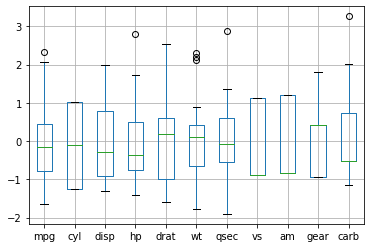

In [36]:
#dataset scaling and visualizing
from sklearn.preprocessing import StandardScaler
scaler3 = StandardScaler(copy=False) #or alternatively use MinMaxScaler
scaler3.fit(cars.astype(float)) 
df_cars=pd.DataFrame(scaler3.transform(cars.astype(float))) 
df_cars.columns=cars.columns
df_cars.boxplot()

In [37]:
from sklearn.decomposition import PCA
pca3 = PCA()
pca3.fit(df_cars)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

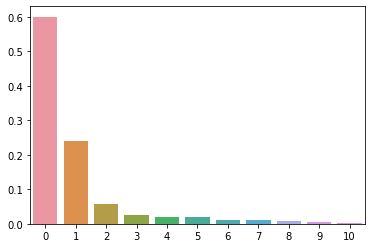

In [38]:
explained = pd.DataFrame(pca3.explained_variance_ratio_).transpose()
sns.barplot(data=explained)

In [39]:
pd.DataFrame(pca3.components_,columns=cars.columns)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,0.362531,-0.373916,-0.368185,-0.330057,0.294151,-0.346103,0.200456,0.306511,0.234943,0.206916,-0.214018
1,0.016124,0.043744,-0.049324,0.248784,0.274694,-0.143038,-0.463375,-0.231647,0.429418,0.462349,0.413571
2,-0.225744,-0.175311,-0.061484,0.140015,0.161189,0.341819,0.403169,0.428815,-0.205767,0.289780,0.528545
3,-0.022540,-0.002592,0.256608,-0.067676,0.854829,0.245899,0.068077,-0.214849,-0.030463,-0.264691,-0.126789
4,0.102845,0.058484,0.393995,0.540047,0.077327,-0.075029,-0.164666,0.599540,0.089781,0.048330,-0.361319
5,-0.108797,0.168554,-0.336165,0.071436,0.244497,-0.464940,-0.330480,0.194017,-0.570817,-0.243563,0.183522
6,0.367724,0.057278,0.214303,-0.001496,0.021120,-0.020668,0.050011,-0.265781,-0.587305,0.605098,-0.174603
7,0.754091,0.230825,-0.001142,0.222358,-0.032194,0.008572,0.231840,-0.025935,0.059747,-0.336150,0.395629
8,-0.235702,-0.054035,-0.198428,0.575830,0.046901,-0.359498,0.528377,-0.358583,0.047404,0.001735,-0.170641
9,0.139285,-0.846419,0.049380,0.247824,-0.101494,0.094394,-0.270673,-0.159039,-0.177785,-0.213825,0.072260


In [40]:
cars_pca = pd.DataFrame(pca3.transform(df_cars),columns = ['pc1', 'pc2','pc3','pc4','pc5', 'pc6','pc7','pc8','pc9','pc10','pc11']
                        ,index=cars.index.values)
cars_pca.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11
Mazda RX4,0.657213,1.735446,-0.601199,0.115522,-0.960653,-0.017259,-0.433311,0.009785,-0.148766,-0.067771,-0.182569
Mazda RX4 Wag,0.629396,1.550033,-0.382322,0.202307,-1.032949,-0.245592,-0.422860,0.085873,-0.075721,-0.128959,-0.090063
Datsun 710,2.779397,-0.146457,-0.241238,-0.249139,0.405143,-0.354348,-0.618584,-0.594620,0.133328,0.046470,0.096147
Hornet 4 Drive,0.311771,-2.363019,-0.135759,-0.511862,0.557997,0.019606,-0.041007,0.050376,-0.223742,-0.061366,-0.149973
Hornet Sportabout,-1.974489,-0.754402,-1.134402,0.075653,0.210836,0.151580,0.389645,0.162863,0.021515,-0.060787,-0.148750


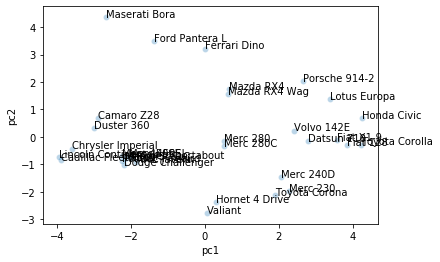

In [41]:
p2=sns.scatterplot(x="pc1", y="pc2",
              alpha=.3,
              data=cars_pca);
# add annotations one by one with a loop
for line in range(0,cars_pca.shape[0]):
     p2.text(cars_pca.pc1[line], cars_pca.pc2[line], cars_pca.index[line], horizontalalignment='left', size='medium', color='black')


## Iris database

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()


In [44]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [45]:
#create the dataframe
iris_df = pd.DataFrame(iris.data)
iris_df.columns = iris.feature_names

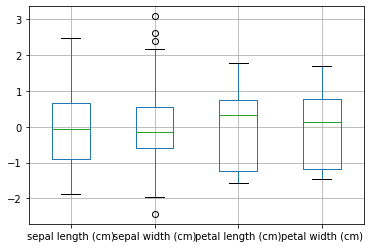

In [46]:
from sklearn.preprocessing import StandardScaler
iris_scaler = StandardScaler(copy=False) #or alternatively use MinMaxScaler
iris_scaler.fit(iris_df) # 
iris_scaler.transform(iris_df)
iris_df.boxplot()

In [47]:
#PCA fit
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(iris_df)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [48]:
#VISUALIZE The percentage of variance explained by each of the selected components.
pd.DataFrame(pca.explained_variance_ratio_).transpose()


,0,1,2,3
0,0.729624,0.228508,0.036689,0.005179


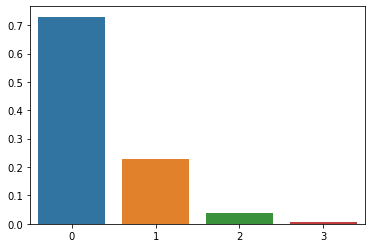

In [49]:
explained = pd.DataFrame(pca.explained_variance_ratio_).transpose()
sns.barplot(data=explained)

In [34]:
pd.DataFrame(pca.components_,columns=iris_df.columns)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.521066,-0.269347,0.580413,0.564857
1,0.377418,0.923296,0.024492,0.066942
2,-0.719566,0.244382,0.142126,0.634273
3,-0.261286,0.123510,0.801449,-0.523597


PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [50]:
# Let see the coordinates of the data in the PCA 
iris_pca = pd.DataFrame(pca.transform(iris_df),columns = ['pc1', 'pc2','pc3','pc4']
                        ,index=iris_df.index.values)
iris_pca.head()

,pc1,pc2,pc3,pc4
0,-2.264703,0.480027,-0.127706,-0.024168
1,-2.080961,-0.674134,-0.234609,-0.103007
2,-2.364229,-0.341908,0.044201,-0.028377
3,-2.299384,-0.597395,0.091290,0.065956
4,-2.389842,0.646835,0.015738,0.035923


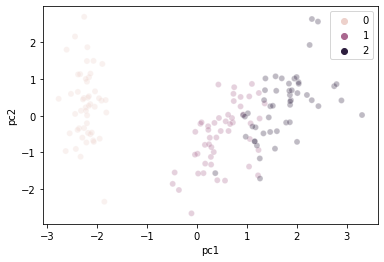

In [51]:
# The data in the first two PCA 
sns.scatterplot(x="pc1", y="pc2",
              hue=iris['target'], alpha=.3,
              data=iris_pca);

In [43]:
iris

{'data': array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
         -1.31544430e+00],
        [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
         -1.31544430e+00],
        [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
         -1.31544430e+00],
        [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
         -1.31544430e+00],
        [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
         -1.31544430e+00],
        [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
         -1.05217993e+00],
        [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
         -1.18381211e+00],
        [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
         -1.31544430e+00],
        [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
         -1.31544430e+00],
        [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
         -1.44707648e+00],
        [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
         -1.31544430e+00],
        [-1.26418478e+00,  7.888075